# Project: Wrangling and Analyze Data

In [1]:
# import relevant libraries

import numpy as np
import pandas as pd
import requests
import tweepy
import json
import matplotlib.pyplot as plt
import seaborn as sns

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.

1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
# read download data into a pandas dataframe

twitter_df = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# view first few rows of the dataframe

twitter_df.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
# url we're downloading the data from
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

response = requests.get(url)

In [5]:
response

<Response [200]>

Response 200 means that our request to get the data from the url was successful.

In [ ]:
with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)

In [6]:
# read the image data into a dataframe
image_df = pd.read_csv('image_predictions.tsv', sep='\t')

# view first few rows of the dataframe
image_df.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [ ]:
# keys and token to access the API
consumer_key = 'CONSUMER KEY'
consumer_secret = 'CONSUMER SECRET'
access_token = 'ACCESS TOKEN'
access_secret = 'ACCESS SECRET'

# access the API
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [ ]:
# get all the tweet ids in twitter_df
tweet_ids = list(twitter_df['tweet_id'].unique())

# for each id, get the tweet data and write it to a txt file, tweet_json.txt
with open('tweet_json.txt', 'w') as file:
    for tweet_id in tweet_ids:
        # To monitor which tweet we're working on currently
        print(f'Gathering id: {tweet_id}')
        try:
            # get the tweet for the tweet_id given, extended tweet mode gives extra data
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            # load the data into our file. It is loaded as json
            json.dump(tweet._json, file)
            # add a new line after so that each tweet would be on a separate line.
            file.write('\n')
        except Exception as e:
            print(f'Error with {tweet_id} id: {str(e)}')
        

In [7]:
# create a list to store dictionaries for each tweet. This is to be converted to a dataframe later.
api_tweets = []

# read the created file
with open("tweet_json.txt", "r") as file:
    for line in file:
        try: 
            tweet = json.loads(line)
            # append a dictionary to the created list            
            api_tweets.append({
                "tweet_id": tweet["id"],
                "retweet_count": tweet["retweet_count"],
                "favorite_count": tweet["favorite_count"],
                "retweeted": tweet["retweeted"],
                "favorited": tweet["favorited"],
                "is_quote_status": tweet["is_quote_status"],
                "display_text_range": tweet["display_text_range"]                
            })               

        except:
            print("Error.") 
            
# create dataframe from the list of dictionaries created
api_df = pd.DataFrame(api_tweets, columns = ["tweet_id", "retweet_count", "favorite_count", "retweeted", "favorited", "is_quote_status", "display_text_range"])
# view first five rows of the newly created dataframe
api_df.head()

,tweet_id,retweet_count,favorite_count,retweeted,favorited,is_quote_status,display_text_range
0,892420643555336193,7036,33872,False,False,False,"[0, 85]"
1,892177421306343426,5312,29385,False,False,False,"[0, 138]"
2,891815181378084864,3491,22100,False,False,False,"[0, 121]"
3,891689557279858688,7243,36999,False,False,False,"[0, 79]"
4,891327558926688256,7784,35374,False,False,False,"[0, 138]"


-------------------------------------------------------------------------------------------------------------------------------

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### Assess twitter_df

##### Visual assessment

In [8]:
# scrolling through to see if I can spot any issues with the data. 
twitter_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


* The `name` columns has 'a' and 'None' as the name of a Dog.
* Most of the rows in the `doggo`, `floofer`, `puppo` and `pupper` columns have 'None' as its value
* The `doggo`, `floofer`, `puppo` and `pupper` columns could be combined into one column since they are all stages a Dog is in.

##### Programmatic assessment

In [9]:
# using pandas functions/methods to assess the data.
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

* `timestamp` column is an object type. It should be of type datetime.
* `tweet_id` is not a numeric value. it should be of type object.

In [10]:
# view the unique values in the name column and how many times they appear.
twitter_df['name'].value_counts()

None       745
a           55
Charlie     12
Oliver      11
Lucy        11
          ... 
Severus      1
Tanner       1
Pippin       1
Jay          1
Gabby        1
Name: name, Length: 957, dtype: int64

* Most of the names of the dogs are 'None', next highest are dog names with 'a' as the name.

In [11]:
# view rows that were not null values in the retweeted_status_id column.
twitter_df[~twitter_df['retweeted_status_id'].isnull()].head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None


* The `retweeted_status_id` column has values that are not null, this means that these tweets are retweets.

In [12]:
# how may different sources did the tweets in the dataframe originate from?
twitter_df['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

* Unnecessary html text around the source of the tweet.

In [13]:
# how many different ratings are there?
twitter_df['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
0         2
15        2
75        2
420       2
182       1
204       1
143       1
121       1
99        1
20        1
45        1
27        1
17        1
24        1
26        1
44        1
50        1
60        1
80        1
84        1
88        1
1776      1
960       1
666       1
144       1
165       1
Name: rating_numerator, dtype: int64

* Having the rating_numerator greater than the numerator is part of why WeRateDogs is popular, so it is only fair if we started investigating rating that are less than 10.

In [14]:
# inspecting dogs that were rated 1/10

twitter_df.query('rating_numerator == 1')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
605,798576900688019456,NaN,NaN,2016-11-15 17:22:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Not familiar with this breed. N...,6.661041e+17,4.196984e+09,2015-11-16 04:02:55 +0000,https://twitter.com/dog_rates/status/666104133...,1,10,None,None,None,None,None
1446,696490539101908992,6.964887e+17,4.196984e+09,2016-02-08 00:27:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After reading the comments I may have overesti...,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None
1869,675153376133427200,NaN,NaN,2015-12-11 03:21:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",What kind of person sends in a picture without...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675153376...,1,10,None,None,None,None,None
1940,673716320723169284,6.737159e+17,4.196984e+09,2015-12-07 04:11:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The millennials have spoken and we've decided ...,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None
2038,671550332464455680,6.715449e+17,4.196984e+09,2015-12-01 04:44:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After 22 minutes of careful deliberation this ...,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None
2091,670783437142401025,NaN,NaN,2015-11-29 01:56:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Flamboyant pup here. Probably poisonous. Won't...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670783437...,1,10,None,None,None,None,None
2261,667549055577362432,NaN,NaN,2015-11-20 03:44:31 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Never seen dog like this. Breathes heavy. Tilt...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667549055...,1,10,None,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None
2338,666104133288665088,NaN,NaN,2015-11-16 04:02:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Not familiar with this breed. No tail (weird)....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666104133...,1,10,None,None,None,None,None


Reading the text for each 1/10 dog rating, it seems that the tweets do not contain pictures of any dog!. Also we can see that index 2335 had the rating extracted wrongly.

In [15]:
# inspecting ratings that were unusually high
twitter_df.query('rating_numerator == 1776')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None


* Nothing wrong here, the dog was infact rated 1776/10!

In [16]:
# inspecting ratings that were given 0
twitter_df.query('rating_numerator == 0')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...","PUPDATE: can't see any. Even if I could, I cou...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459...,0,10,None,None,None,None,None


In [17]:
# inspecting ratings that were given 2
twitter_df.query('rating_numerator == 9')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
485,814578408554463233,NaN,NaN,2016-12-29 21:06:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Beau &amp; Wilbur. Wilbur ...,6.981954e+17,4.196984e+09,2016-02-12 17:22:12 +0000,https://twitter.com/dog_rates/status/698195409...,9,10,Beau,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
845,766423258543644672,NaN,NaN,2016-08-18 23:55:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Shadoe. Her tongue flies out of her mo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/766423258...,9,10,Shadoe,None,None,None,None
906,758041019896193024,NaN,NaN,2016-07-26 20:47:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Teagan reads entire books in store so they're ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758041019...,9,10,None,None,None,None,None
946,752568224206688256,NaN,NaN,2016-07-11 18:20:21 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Here are three doggos completely misjudging an...,NaN,NaN,NaN,https://vine.co/v/5W0bdhEUUVT,9,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2333,666337882303524864,NaN,NaN,2015-11-16 19:31:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an extremely rare horned Parthenon. No...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666337882...,9,10,an,None,None,None,None
2341,666094000022159362,NaN,NaN,2015-11-16 03:22:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This appears to be a Mongolian Presbyterian mi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666094000...,9,10,None,None,None,None,None
2344,666071193221509120,NaN,NaN,2015-11-16 01:52:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a northern speckled Rhododendron....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666071193...,9,10,None,None,None,None,None
2347,666057090499244032,NaN,NaN,2015-11-16 00:55:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",My oh my. This is a rare blond Canadian terrie...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666057090...,9,10,a,None,None,None,None


* After manually inspecting ratings less than 10, it seems that these dog tweets were either not pictures of dogs, had other people/objects in the pictures or the full dog potrait was not displayed. There were a few that had the rating extracted wrongly probably because of the presence of other numbers in the text (for example, referring to the date 9/11 in the text makes 9 to be extracted as the rating_numerator). 

In [18]:
# Are all ratings totalled over the same number?
twitter_df['rating_denominator'].nunique()

18

In [19]:
twitter_df['rating_denominator'].value_counts()

10     2333
11        3
50        3
20        2
80        2
0         1
120       1
7         1
170       1
150       1
130       1
90        1
110       1
2         1
70        1
40        1
16        1
15        1
Name: rating_denominator, dtype: int64

* ratings are totalled by 10 for the most part, but there are some rows with other values, 0 even. Need to investigate to see what's going on there.

In [20]:
# inspecting ratings that were totalled over 2
twitter_df.query('rating_denominator == 2')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None


In [21]:
# inspecting ratings that were totalled over 70
twitter_df.query('rating_denominator == 70')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None


In [22]:
# inspecting ratings that were totalled over 15
twitter_df.query('rating_denominator == 15')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
342,832088576586297345,8.320875e+17,30582082.0,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None


In [23]:
# inspecting ratings that were totalled over 7
twitter_df.query('rating_denominator == 7')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None


In [24]:
# inspecting ratings that were totalled over 170
twitter_df.query('rating_denominator == 170')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None


In [25]:
# inspecting ratings that were totalled over 0
twitter_df.query('rating_denominator == 0')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


After manually inspecting the ratings, some of the denominator ratings were extracted wrongly, others were high because there was more than one dog in the picture (This also made some numerator ratings high too). 

In [26]:
# check for duplicates
twitter_df.duplicated().sum()

0

-------------------------------------------------------------------------------------------------------------------------------

### Assess image_df

##### Visual Assessment

In [27]:
image_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


* prediction names (p1, p2, p3) have some in lower case, others in title case.
* Some of the column names (p1_conf, p2_conf, p3_conf) are not descriptive enough.
* The prediction columns could be reduced to one prediction and one confidence column.

##### Programmatic Assessment

In [28]:
# using pandas functions/methods to assess the data.
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


* No null values.
* `tweet id` is not numeric. It should be of type object.

In [29]:
# check for retweets
image_df['jpg_url'].nunique()

2009

* retweeted tweets would have the same image (jpg_url column) as the original tweet. 2009 tweets have unique images, that means that there are 66 retweeted tweets in this dataframe.

In [30]:
# rows with duplicated jpg_url column
image_df[image_df['jpg_url'].duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1903,851953902622658560,https://pbs.twimg.com/media/C4KHj-nWQAA3poV.jpg,1,Staffordshire_bullterrier,0.757547,True,American_Staffordshire_terrier,0.149950,True,Chesapeake_Bay_retriever,0.047523,True
1944,861769973181624320,https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg,2,Arabian_camel,0.366248,False,house_finch,0.209852,False,cocker_spaniel,0.046403,True
1992,873697596434513921,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False
2041,885311592912609280,https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg,1,Labrador_retriever,0.908703,True,seat_belt,0.057091,False,pug,0.011933,True


In [31]:
# let's check to see if there are any rows where the algorithm did not identify and dog.

image_df[(image_df['p1_dog'] == False) & (image_df['p2_dog'] == False) & (image_df['p3_dog'] == False)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,0.002402,False,hamster,0.000461,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2021,880935762899988482,https://pbs.twimg.com/media/DDm2Z5aXUAEDS2u.jpg,1,street_sign,0.251801,False,umbrella,0.115123,False,traffic_light,0.069534,False
2022,881268444196462592,https://pbs.twimg.com/media/DDrk-f9WAAI-WQv.jpg,1,tusker,0.473303,False,Indian_elephant,0.245646,False,ibex,0.055661,False
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/88751...,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False


* By manually checking some of the images, some of them are indeed not dogs. others have additional objects in the image that makes it dfficult for the algorithm to identify the dog in the image.

-------------------------------------------------------------------------------------------------------------------------------

### Assess api_df

##### Visual Assessment

In [32]:
api_df

,tweet_id,retweet_count,favorite_count,retweeted,favorited,is_quote_status,display_text_range
0,892420643555336193,7036,33872,False,False,False,"[0, 85]"
1,892177421306343426,5312,29385,False,False,False,"[0, 138]"
2,891815181378084864,3491,22100,False,False,False,"[0, 121]"
3,891689557279858688,7243,36999,False,False,False,"[0, 79]"
4,891327558926688256,7784,35374,False,False,False,"[0, 138]"
...,...,...,...,...,...,...,...
2322,666049248165822465,37,89,False,False,False,"[0, 120]"
2323,666044226329800704,115,247,False,False,False,"[0, 137]"
2324,666033412701032449,36,100,False,False,False,"[0, 130]"
2325,666029285002620928,39,112,False,False,False,"[0, 139]"


* The `display_text_range` column could be split into two columns.

##### Programmatic Assessment

In [33]:
# use pandas functions/methods to assess the data
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2327 non-null   int64 
 1   retweet_count       2327 non-null   int64 
 2   favorite_count      2327 non-null   int64 
 3   retweeted           2327 non-null   bool  
 4   favorited           2327 non-null   bool  
 5   is_quote_status     2327 non-null   bool  
 6   display_text_range  2327 non-null   object
dtypes: bool(3), int64(3), object(1)
memory usage: 79.7+ KB


* As with the previous two dataframes, the `tweet_id` should be of type object.

In [34]:
# check for duplicates
api_df['tweet_id'].duplicated().sum()

0

In [35]:
# check to see unique values in the retweeted column 
api_df['retweeted'].value_counts()

False    2327
Name: retweeted, dtype: int64

In [36]:
# check to see unique values in the favorited column 
api_df['favorited'].value_counts()

False    2327
Name: favorited, dtype: int64

* Seems that `retweeted` and `favorited` columns all contain one value all through.

-------------------------------------------------------------------------------------------------------------------------------

### Quality issues
##### twitter_df
1. The `name` columns has 'a' and 'None' as the name of a Dog.

2. Most of the rows in the `doggo`, `floofer`, `puppo` and `pupper` columns in the have 'None' as its value.

3. There are not null values in the `retweeted_status_id` column.

4. `timestamp` column is an object type. It should be of type datetime.

5. `tweet_id` is not a numeric value. it should be of type object.

6. `source` column has unnecessary html tags surrounding the main information.

7. `rating_denominator` column contain numbers like 0, 2, 7. Check to see that the ratings for these rows were extracted correctly.

8. `rating_numerator` column contain numbers like 0, 143, 24. Check to see that the ratings for these rows were extracted correctly.
*The rating columns issues will be addressed after merging the three dataframes to create a master dataframe.*

##### image_df
1. Prediction names (p1, p2, p3) have some names in lower case, others in title case.

2. `tweet id` is not numeric. It should be of type object.

3. Some of the tweets are not images of dogs.

4. Some column names (p1_conf, p2_conf, p3_conf) are not descriptive enough.

##### api_df
1. `tweet id` is not numeric. It should be of type object.

2. Seems that `retweeted` and `favorited` columns all contain one value all through.

### Tidiness issues

##### twitter_df
1. The `doggo`, `floofer`, `puppo` and `pupper` columns could be combined into one column since they are all stages a Dog is in.

##### image_df
1. The prediction columns (p1, p2, p3 and p1_conf, p2_conf, p3_conf) could be reduced to one prediction (prediction) and one confidence (confidence) column.

##### api_df
1. The `display_text_range` column could be split into two columns.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [37]:
# Make copies of original pieces of data
twitter_df_clean = twitter_df.copy()
image_df_clean = image_df.copy()
api_df_clean = api_df.copy()

### twitter_df_clean

### Quality issue #1:

##### The `name` columns has 'a' and 'None' as the name of a Dog.

#### Define: 
Replace the 'a' and 'None' values in the `name` column with null

#### Code

In [38]:
# loop through and replace the two values with null

for value in ['a', 'None']:
    twitter_df_clean['name'].replace(value, np.nan, inplace=True)

#### Test

In [39]:
# the previous top two values 'None' and 'a' are gone.
twitter_df_clean['name'].value_counts()

Charlie    12
Lucy       11
Oliver     11
Cooper     11
Lola       10
           ..
Jay         1
Severus     1
Tanner      1
Pippin      1
Gabby       1
Name: name, Length: 955, dtype: int64

### Quality issue #2: 

##### Most of the rows in the `doggo`, `floofer`, `puppo` and `pupper` columns in the have 'None' as its value.

#### Define:

Replace rows containing 'None' with an empty string. This makes is easier to combine the columns later.

#### Code

In [40]:
# loop through the four columns and replace 'None' with ''.
columns = ['doggo', 'floofer', 'puppo', 'pupper']

for column in columns:
    twitter_df_clean[column].replace('None', '', inplace=True)

#### Test

In [41]:
twitter_df_clean[columns].head()

,doggo,floofer,puppo,pupper
0,,,,
1,,,,
2,,,,
3,,,,
4,,,,


### Quality issue #3:

##### There are not null values in the `retweeted_status_id` column.

#### Define:

Drop rows with non null values in the `retweeted_status_id` column.
> The presence of values that are not NaN means that those tweets are retweets. Since we only want original tweets with images, these rows have to be dropped.
>
> After we can drop all columns related to retweets since they'll contain only null values.

#### Code

In [42]:
# select the index of rows that have not null values in the selected column and turn it to a list.
remove_index = list(twitter_df_clean[~twitter_df_clean['retweeted_status_id'].isnull()].index)

# drop all the rows whose index is in the list created
twitter_df_clean.drop(labels=remove_index, inplace=True)

In [43]:
# drop all columns related to retweets
twitter_df_clean.drop(columns=['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], inplace=True)

#### Test

In [44]:
# check that the columns dropped no longer exist
twitter_df_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

### Quality issue #4:

##### `timestamp` column is an object type. It should be of type datetime.

#### Define:

Convert the `timestamp` column to datetime type using pandas to_datetime function

#### Code

In [45]:
twitter_df_clean['timestamp'] = pd.to_datetime(twitter_df_clean['timestamp'])

#### Test

In [46]:
# check datatype of the timestamp column.
twitter_df_clean['timestamp'].dtype

datetime64[ns, UTC]

### Quality issue #5:

##### `tweet_id` is not a numeric value. it should be of type object.

#### Define:

Convert `tweet_id` to type object using .astype()

#### Code

In [47]:
twitter_df_clean['tweet_id'] = twitter_df_clean['tweet_id'].astype('str')

#### Test

In [48]:
# check the datatype of the tweet_id column.
twitter_df_clean['tweet_id'].dtype

dtype('O')

### Quality issue #6:

##### `source` column has unnecessary html text around it.

#### Define:

Extract relevant info from the `source` column.

#### Code

In [49]:
# check for unique values so that we can figure out the regex pattern to use.
twitter_df_clean['source'].unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [50]:
# this regex expression matches the text that is inbetween '>' and '<' and returns it
twitter_df_clean['source'] = twitter_df_clean['source'].str.extract('>(.*?)<', expand=True)[0]

#### Test

In [51]:
# check for unique values to view changes.
twitter_df_clean['source'].unique()

array(['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene',
       'TweetDeck'], dtype=object)

### Tidiness issue #1:

##### The `doggo`, `floofer`, `puppo` and `pupper` columns could be combined into one column since they are all stages a Dog is in.

#### Define:

Join these four coulums together by simply adding them as strings. This was why we converted the values that were 'None' in these columns earlier to empty strings.

#### Code

In [52]:
# Add the four columns together to get a single column that states the stage that the dog is in.

twitter_df_clean['dog_stage'] = twitter_df_clean['doggo'] + twitter_df_clean['floofer'] + twitter_df_clean['puppo'] + twitter_df_clean['pupper']

In [53]:
# check for unique values to see changes.
twitter_df_clean['dog_stage'].unique()

array(['', 'doggo', 'puppo', 'pupper', 'floofer', 'doggopuppo',
       'doggofloofer', 'doggopupper'], dtype=object)

* Seems there are some dogs that have been documented as being in different stages at once.
* Let's filter out the columns that are classed as having multiple stages and see if we can fix them

In [54]:
# Filter out columns with multiple dog stages
two_stages = ['doggopuppo', 'doggofloofer', 'doggopupper']
twitter_df_clean[twitter_df_clean['dog_stage'].isin(two_stages)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02+00:00,Twitter for iPhone,Here's a puppo participating in the #ScienceMa...,https://twitter.com/dog_rates/status/855851453...,13,10,NaN,doggo,,,puppo,doggopuppo
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26+00:00,Twitter for iPhone,"At first I thought this was a shy doggo, but i...",https://twitter.com/dog_rates/status/854010172...,11,10,NaN,doggo,floofer,,,doggofloofer
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28+00:00,Twitter for iPhone,"This is Dido. She's playing the lead role in ""...",https://twitter.com/dog_rates/status/817777686...,13,10,Dido,doggo,,pupper,,doggopupper
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28+00:00,Twitter for iPhone,Here we have Burke (pupper) and Dexter (doggo)...,https://twitter.com/dog_rates/status/808106460...,12,10,NaN,doggo,,pupper,,doggopupper
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47+00:00,Twitter for iPhone,"Like doggo, like pupper version 2. Both 11/10 ...",https://twitter.com/dog_rates/status/802265048...,11,10,NaN,doggo,,pupper,,doggopupper
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25+00:00,Twitter for iPhone,This is Bones. He's being haunted by another d...,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,doggo,,pupper,,doggopupper
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48+00:00,Twitter for iPhone,This is Pinot. He's a sophisticated doggo. You...,https://twitter.com/dog_rates/status/785639753...,10,10,Pinot,doggo,,pupper,,doggopupper
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20+00:00,Vine - Make a Scene,"Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",https://vine.co/v/5rgu2Law2ut,12,10,NaN,doggo,,pupper,,doggopupper
889,759793422261743616,NaN,NaN,2016-07-31 16:50:42+00:00,Twitter for iPhone,"Meet Maggie &amp; Lila. Maggie is the doggo, L...",https://twitter.com/dog_rates/status/759793422...,12,10,Maggie,doggo,,pupper,,doggopupper
956,751583847268179968,NaN,NaN,2016-07-09 01:08:47+00:00,Twitter for iPhone,Please stop sending it pictures that don't eve...,https://twitter.com/dog_rates/status/751583847...,5,10,NaN,doggo,,pupper,,doggopupper


* Seems they are not a lot of them. We can just change it manually to the correct dog stage as seen in the `text` column. For cases where there are multiple dogs in the tweet, hence multiple stages listed, we put NaN.

In [55]:
# 191 - puppo
# 200 - floofer
# 460 - pupper
# 531 - two dogs, np.nan
# 565 - two dogs, np.nan
# 575 - pupper
# 705 - doggo
# 733 - two dogs, np.nan
# 889 - two dogs, np.nan
# 956 - doggo
# 1063 - two dogs, np.nan
# 1113 - two dogs, np.nan

twitter_df_clean.loc[191, 'dog_stage'] = 'puppo'
twitter_df_clean.loc[200, 'dog_stage'] = 'floofer'
twitter_df_clean.loc[460, 'dog_stage'] = 'pupper'
twitter_df_clean.loc[531, 'dog_stage'] = np.nan
twitter_df_clean.loc[565, 'dog_stage'] = np.nan
twitter_df_clean.loc[575, 'dog_stage'] = 'pupper'
twitter_df_clean.loc[705, 'dog_stage'] = 'doggo'
twitter_df_clean.loc[733, 'dog_stage'] = np.nan
twitter_df_clean.loc[889, 'dog_stage'] = np.nan
twitter_df_clean.loc[956, 'dog_stage'] = 'doggo'
twitter_df_clean.loc[1063, 'dog_stage'] = np.nan
twitter_df_clean.loc[1113, 'dog_stage'] = np.nan

In [56]:
# change empty strings to NaN
twitter_df_clean['dog_stage'].replace('', np.nan, inplace=True)

In [57]:
# drop the `doggo`, `floofer`, `pupper`, `puppo` columns
twitter_df_clean.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], inplace=True)

#### Test

In [58]:
# check to see that there are only four dog stages and nan
twitter_df_clean['dog_stage'].unique()

array([nan, 'doggo', 'puppo', 'pupper', 'floofer'], dtype=object)

In [59]:
# Check to see that the dropped columns are gone
twitter_df_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stage'],
      dtype='object')

-------------------------------------------------------------------------------------------------------------------------------

### image_df_clean

### Quality issue #1:

##### Prediction names (p1, p2, p3) have some names in lower case, others in title case.

#### Define:

Convert the all the column's values to title case using the .str.title() function.

#### Code

In [60]:
columns = ['p1', 'p2', 'p3']

# loop through the columns and change to title case
for column in columns:
    image_df_clean[column] = image_df_clean[column].str.title()

#### Test

In [61]:
# view first 7 rows to check that the changes are effected
image_df_clean[['p1', 'p2', 'p3']].head(7)

,p1,p2,p3
0,Welsh_Springer_Spaniel,Collie,Shetland_Sheepdog
1,Redbone,Miniature_Pinscher,Rhodesian_Ridgeback
2,German_Shepherd,Malinois,Bloodhound
3,Rhodesian_Ridgeback,Redbone,Miniature_Pinscher
4,Miniature_Pinscher,Rottweiler,Doberman
5,Bernese_Mountain_Dog,English_Springer,Greater_Swiss_Mountain_Dog
6,Box_Turtle,Mud_Turtle,Terrapin


### Quality issue #2:

##### `tweet id` is not numeric. It should be of type object.

#### Define:

Convert the `tweet_id` column to object type usig the .astype() function.

#### Code

In [62]:
image_df_clean['tweet_id'] = image_df_clean['tweet_id'].astype('str')

#### Test

In [63]:
# check the datatype of the tweet_id column.
image_df_clean['tweet_id'].dtype

dtype('O')

### Quality issue #3:

##### Some of the tweets are not images of dogs.

#### Define:

Drop rows that have `p1_dog`, `p2_dog` and `p3_dog` as False
> Since we're gathering tweets on dog ratings, any tweet that does not contain a dog in the picture is not relevant in our analysis.

#### Code

In [64]:
# select the index of rows that do not have dog predictions in any of the three prediction columns
remove_index = list(image_df_clean.query("p1_dog == False and p2_dog == False and p3_dog == False").index)

# drop all the rows whose index is in the list created
image_df_clean.drop(labels=remove_index, inplace=True)

#### Test

In [65]:
# check to see that there are no rows with no dog prediction.
image_df_clean.query("p1_dog == False and p2_dog == False and p3_dog == False")

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


### Quality issue #4:

##### Some column names (p1_conf, p2_conf, p3_conf) are not descriptive enough.

#### Define:

Rename non-descriptive columns with the .rename() function.

#### Code

In [66]:
image_df_clean.rename(columns={'p1_conf': 'p1_confidence_interval', 
                               'p2_conf': 'p2_confidence_interval', 
                               'p3_conf': 'p3_confidence_interval'}, inplace=True)

#### Test

In [67]:
# view new column names
image_df_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_confidence_interval',
       'p1_dog', 'p2', 'p2_confidence_interval', 'p2_dog', 'p3',
       'p3_confidence_interval', 'p3_dog'],
      dtype='object')

### Tidiness issue #1:

##### The prediction columns (p1, p2, p3 and p1_conf, p2_conf, p3_conf) could be reduced to one prediction (prediction) and one confidence (confidence) column.

#### Define:

Select the prediction column with the highest confidence interval that is a dog for each tweet (because some rows have other things having the highest confidence interval that isn't a dog and we want only dogs) .
> This just leaves the dog prediction with the highest probability. Drop the other prediction columns so that we'll be left with one prediction column and one confidence interval column.

The .apply() function would be used to achieve this.

#### Code

In [68]:
image_df_clean.query("p2_confidence_interval > p1_confidence_interval")

,tweet_id,jpg_url,img_num,p1,p1_confidence_interval,p1_dog,p2,p2_confidence_interval,p2_dog,p3,p3_confidence_interval,p3_dog


In [69]:
image_df_clean.query("p3_confidence_interval > p2_confidence_interval")

,tweet_id,jpg_url,img_num,p1,p1_confidence_interval,p1_dog,p2,p2_confidence_interval,p2_dog,p3,p3_confidence_interval,p3_dog


In [70]:
image_df_clean.query("p3_confidence_interval > p1_confidence_interval")

,tweet_id,jpg_url,img_num,p1,p1_confidence_interval,p1_dog,p2,p2_confidence_interval,p2_dog,p3,p3_confidence_interval,p3_dog


* The previous three lines of code show that the confidence intervals were ordered for all rows, p1_confidence_interval having the largest value, p2_confidence_interval having the second largest and p3_confidence_interval having the least.

* Next is to create a function that returns the dog with the highest confidence interval and pass it into the .apply() function.

In [71]:
# function to return highest confidence interval dog prediction.
def get_attribute(df):
    '''
    This function is used on a dataframe with the .apply() function. It checks to see if the first value in the first
    column is True, if yes, it returns the corresponding first value in the second column. If not, it moves to the first 
    value in the third column and so on. If none are True, it returns np.nan.
    
    Parameters: Columns in the dataframe must be in the order: check1, result1, check2, result2, result3
    
    Output: A new column with the result values for checks that evaluated to True.
    '''
    
    # check if the first column is True (checks whether it is a dog)
    if df[0] == True:
        # return the value in the second column (the confidence interval)
        return df[1]
    
    # check if the third column is True (checks whether it is a dog)
    elif df[2] == True:
        # return the value in the fourth column (the confidence interval)
        return df[3]
    
    # if all else are False, return the value in the fifth column
    else:
        return df[4]

In [72]:
# apply the function to get the type of the dog
image_df_clean["breed"] = image_df_clean[["p1_dog", "p1", "p2_dog", "p2", "p3"]].apply(get_attribute, axis = 1)

# apply the function to get the confidence interval corresponding to the type of the dog chosen
image_df_clean["confidence_interval"] = image_df_clean[["p1_dog", "p1_confidence_interval", 
                                         "p2_dog", "p2_confidence_interval", 
                                         "p3_confidence_interval"]].apply(get_attribute, axis = 1)

* Next, we drop all the columns relating to predictions (all columns with names starting with 'p').

In [73]:
# list out columns to be dropped
drop_cols = ['p1', 'p1_confidence_interval', 'p1_dog', 
             'p2', 'p2_confidence_interval', 'p2_dog', 
             'p3', 'p3_confidence_interval', 'p3_dog']

# drop columns
image_df_clean.drop(columns=drop_cols, inplace=True)

#### Test

In [74]:
# view first 5 rows
image_df_clean.head()

,tweet_id,jpg_url,img_num,breed,confidence_interval
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_Springer_Spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_Shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_Ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_Pinscher,0.560311


------------------------------------------------------------------------------------------------------------------------------

### api_df_clean

### Quality issue #1:

##### `tweet id` is not numeric. It should be of type object.

#### Define:

Convert the `tweet_id` column to object type using the .astype() function.

#### Code

In [75]:
api_df_clean['tweet_id'] = api_df_clean['tweet_id'].astype('str')

#### Test

In [76]:
# check the datatype of tweet_id column to see if changes are effected.
api_df_clean['tweet_id'].dtype

dtype('O')

### Quality issue #2:

##### Seems that `retweeted` and `favorited` columns all contain one value all through.

#### Define:

Since these columns all contain one value (False), it means that all the tweets in this dataframe are original tweets.
> Drop these columns because they're not useful.

#### Code

In [77]:
api_df_clean.drop(columns=['retweeted', 'favorited'], inplace=True)

#### Test

In [78]:
# view first few rows
api_df_clean.head()

,tweet_id,retweet_count,favorite_count,is_quote_status,display_text_range
0,892420643555336193,7036,33872,False,"[0, 85]"
1,892177421306343426,5312,29385,False,"[0, 138]"
2,891815181378084864,3491,22100,False,"[0, 121]"
3,891689557279858688,7243,36999,False,"[0, 79]"
4,891327558926688256,7784,35374,False,"[0, 138]"


### Tidiness issue #1:

##### The `display_text_range` column could be split into two columns.

#### Define:

Split the column into two columns with the .apply() function.

#### Code

In [79]:
# get the lower text range at list index 0
api_df_clean["lower_text_range"] = api_df_clean["display_text_range"].apply(lambda x: x[0])

# get the lower text range at list index 1
api_df_clean["upper_text_range"] = api_df_clean["display_text_range"].apply(lambda x: x[1])

* Next, drop the original column since it is no longer useful.

In [80]:
api_df_clean.drop("display_text_range", axis = 1, inplace = True)

#### Test

In [81]:
# view first few rows to see changes.
api_df_clean.head()

,tweet_id,retweet_count,favorite_count,is_quote_status,lower_text_range,upper_text_range
0,892420643555336193,7036,33872,False,0,85
1,892177421306343426,5312,29385,False,0,138
2,891815181378084864,3491,22100,False,0,121
3,891689557279858688,7243,36999,False,0,79
4,891327558926688256,7784,35374,False,0,138


-------------------------------------------------------------------------------------------------------------------------------

## Joining the dataframes to create the Master dataset.

Now that all three datasets are cleaned, it's time to merge them to create the master dataset. The `twitter_df_clean` dataframe that we're confident contains no retweets and only original tweets would be merged with the `image_df_clean` dataframe with an inner join. **This first of all ensures that we only have original tweets with images.** This inner join automatically eliminates retweets in the `image_df_clean` dataframe (rows with the same jpg_url values in the *jpg_url* column). We couldn't just drop duplicates because we can't be sure if the second occurrence of the duplicate jpg_url (the one that would be dropped) is the original tweet or the retweeted tweet and dropping the wrong duplicate would make you lose the original tweet's tweet id in the *tweet_id* column of the `image_df_clean` dataframe. 

This inner join also takes care of tweets that do not have dogs in the picture (we removed those rows in the `image_df_clean` dataframe), which should also reduce the number of values less than 10 in the *ratings_numerator* column in the `twitter_df_clean` dataframe.

After, we perform another inner join to merge the newly merged datasets with the `api_df_clean` dataframe. This is to also fulfill the specifications of only having original tweets with images.

In [82]:
# merge the twitter_df_clean and image_df_clean dataframes
master_df = twitter_df_clean.merge(image_df_clean, how='inner', on='tweet_id')

# view first few rows
master_df.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,breed,confidence_interval
0,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581
1,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012
2,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador_Retriever,0.168086


In [83]:
# merge the newly created master_df and the api_df_clean dataframes
master_df = master_df.merge(api_df_clean, how='inner', on='tweet_id')

# view first few rows
master_df.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,breed,confidence_interval,retweet_count,favorite_count,is_quote_status,lower_text_range,upper_text_range
0,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,5312,29385,False,0,138
1,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,3491,22100,False,0,121
2,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador_Retriever,0.168086,7243,36999,False,0,79


In [84]:
# how many rows and columns does the master dataframe have
master_df.shape

(1678, 20)

In [85]:
# view the structure of the dataframe.
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1678 entries, 0 to 1677
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1678 non-null   object             
 1   in_reply_to_status_id  20 non-null     float64            
 2   in_reply_to_user_id    20 non-null     float64            
 3   timestamp              1678 non-null   datetime64[ns, UTC]
 4   source                 1678 non-null   object             
 5   text                   1678 non-null   object             
 6   expanded_urls          1678 non-null   object             
 7   rating_numerator       1678 non-null   int64              
 8   rating_denominator     1678 non-null   int64              
 9   name                   1214 non-null   object             
 10  dog_stage              254 non-null    object             
 11  jpg_url                1678 non-null   object           

* The `in_reply_to_status_id` and `in_reply_to_user_id` columns are reply tweets made by WeRateDogs under another dog tweet. I've decided to leave them as original tweets because these tweets could be viewed as original tweets 

In [86]:
master_df['rating_denominator'].value_counts()

10     1661
50        3
11        2
80        2
2         1
7         1
20        1
40        1
70        1
90        1
110       1
120       1
130       1
150       1
Name: rating_denominator, dtype: int64

In [87]:
master_df['rating_numerator'].value_counts()

12     421
10     358
11     356
13     225
9      133
8       68
7       32
14      23
6       16
5       14
4        7
3        5
2        2
121      1
84       1
88       1
99       1
0        1
143      1
144      1
75       1
80       1
24       1
60       1
50       1
45       1
44       1
27       1
26       1
1        1
165      1
Name: rating_numerator, dtype: int64

* Both the `rating_numerator` and `rating_denominator` columns have ratings with too high or too low numbers. I left cleaning of the ratings columns for last because the inner joins between tables would eliminate most of the wrong/incorrect ratings. Fortunately, there aren't a lot of them after merging the dataframes.

-------------------------------------------------------------------------------------------------------------------------------

## Cleaning master dataset

In [88]:
# make copy of the original data
master_df_clean = master_df.copy()

### master_df_clean

### Quality issue #1:

##### `rating_denominator` has numbers like 0, 2, 7. Check to see that the rating was extracted correctly.

#### Define:

Manually check the weird ratings in the `rating_denominator` column and change to the correct values where necessary using .loc or .iloc.

#### Code

In [89]:
# view values to be checked
master_df_clean['rating_denominator'].value_counts()

10     1661
50        3
11        2
80        2
2         1
7         1
20        1
40        1
70        1
90        1
110       1
120       1
130       1
150       1
Name: rating_denominator, dtype: int64

In [90]:
# put the values to be checked in a list, exclude 10 of course
denominators = list(master_df_clean['rating_denominator'].value_counts()[1:].index)

# return rows that have this rating_denominator
master_df_clean[master_df_clean['rating_denominator'].isin(denominators)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,breed,confidence_interval,retweet_count,favorite_count,is_quote_status,lower_text_range,upper_text_range
288,820690176645140481,NaN,NaN,2017-01-15 17:52:40+00:00,Twitter for iPhone,The floofs have been released I repeat the flo...,https://twitter.com/dog_rates/status/820690176...,84,70,NaN,NaN,https://pbs.twimg.com/media/C2OtWr0VQAEnS9r.jpg,2,West_Highland_White_Terrier,0.872064,3009,11610,False,0,75
344,810984652412424192,NaN,NaN,2016-12-19 23:06:23+00:00,Twitter for iPhone,Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,NaN,https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg,1,Golden_Retriever,0.871342,1342,5071,False,0,143
587,758467244762497024,NaN,NaN,2016-07-28 01:00:57+00:00,Twitter for iPhone,Why does this never happen at my front door......,https://twitter.com/dog_rates/status/758467244...,165,150,NaN,NaN,https://pbs.twimg.com/ext_tw_video_thumb/75846...,1,Labrador_Retriever,0.436377,2033,4484,False,0,54
703,740373189193256964,NaN,NaN,2016-06-08 02:41:38+00:00,Twitter for iPhone,"After so many requests, this is Bretagne. She ...",https://twitter.com/dog_rates/status/740373189...,9,11,NaN,NaN,https://pbs.twimg.com/media/CkZVdJ6WYAAXZ5A.jpg,3,Golden_Retriever,0.807644,12175,32672,False,0,116
784,722974582966214656,NaN,NaN,2016-04-21 02:25:47+00:00,Twitter for iPhone,Happy 4/20 from the squad! 13/10 for all https...,https://twitter.com/dog_rates/status/722974582...,4,20,NaN,NaN,https://pbs.twimg.com/media/CgiFjIpWgAA4wVp.jpg,1,Great_Dane,0.246762,1447,3791,False,0,40
814,716439118184652801,NaN,NaN,2016-04-03 01:36:11+00:00,Twitter for iPhone,This is Bluebert. He just saw that both #Final...,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,NaN,https://pbs.twimg.com/media/CfFNk7cWAAA-hND.jpg,1,Siberian_Husky,0.396495,192,2205,False,0,117
833,713900603437621249,NaN,NaN,2016-03-27 01:29:02+00:00,Twitter for iPhone,Happy Saturday here's 9 puppers on a bench. 99...,https://twitter.com/dog_rates/status/713900603...,99,90,NaN,NaN,https://pbs.twimg.com/media/CehIzzZWQAEyHH5.jpg,1,Golden_Retriever,0.371816,666,2635,False,0,93
852,710658690886586372,NaN,NaN,2016-03-18 02:46:49+00:00,Twitter for iPhone,Here's a brigade of puppers. All look very pre...,https://twitter.com/dog_rates/status/710658690...,80,80,NaN,NaN,https://pbs.twimg.com/media/CdzETn4W4AAVU5N.jpg,1,Soft-Coated_Wheaten_Terrier,0.948617,519,2150,False,0,108
869,709198395643068416,NaN,NaN,2016-03-14 02:04:08+00:00,Twitter for iPhone,"From left to right:\nCletus, Jerome, Alejandro...",https://twitter.com/dog_rates/status/709198395...,45,50,NaN,NaN,https://pbs.twimg.com/media/CdeUKpcWoAAJAWJ.jpg,1,Borzoi,0.490783,592,2277,False,0,144
929,704054845121142784,NaN,NaN,2016-02-28 21:25:30+00:00,Twitter for iPhone,Here is a whole flock of puppers. 60/50 I'll ...,https://twitter.com/dog_rates/status/704054845...,60,50,NaN,NaN,https://pbs.twimg.com/media/CcVOJEcXEAM0FHL.jpg,1,Great_Pyrenees,0.667939,845,2704,False,0,82


In [91]:
# 50 - [should be 10 (11/10). mistaken as 50/50. index 814], [correct rating (60/50). index 929], [correct rating (45/50). index 869]
# 11 - [should be 10 (14/10). mistaken as 9/11. index 703], [should be 10 (10/10). mistaken as 7/11. index 1162]
# 80 - [correct rating (88/80). index 1296], [correct rating (80/80). index 852]
# 2 - should be 10 (9/10). mistaken as 3 1/2. index 1660
# 7 - should np.nan (no rating). mistaken as 24/7. index 344
# 20 - should be 10 (13/10). mistaken as 4/20. index 784
# 40 - correct raing (44/40)
# 70 - correct rating (84/70)
# 90 - correct rating (99/90)
# 110 - correct rating (121/110)
# 120 - correct rating (144/20)
# 130 - correct rating (143/130)
# 150 - correct rating (165/150)

master_df_clean.loc[814, 'rating_denominator'] = 10
master_df_clean.loc[703, 'rating_denominator'] = 10
master_df_clean.loc[1162, 'rating_denominator'] = 10
master_df_clean.loc[1660, 'rating_denominator'] = 10
master_df_clean.loc[344, 'rating_denominator'] = np.nan
master_df_clean.loc[784, 'rating_denominator'] = 10

#### Test

In [92]:
# check value_counts of the rating_denominator to inspect changes. (10 should increase by 5 to give 1666)
master_df_clean['rating_denominator'].value_counts()

10.0     1666
80.0        2
50.0        2
150.0       1
70.0        1
90.0        1
130.0       1
40.0        1
110.0       1
120.0       1
Name: rating_denominator, dtype: int64

### Quality issue #2:

##### `rating_numerator` has numbers like 0, 143, 24. Check to see that the rating was extracted correctly.

#### Define:

Inspect `rating_numerator` values that appear once. Some of the values to be changed can be inferred from the `rating_denominator`solution.

#### Code

In [93]:
master_df_clean['rating_numerator'].value_counts()

12     421
10     358
11     356
13     225
9      133
8       68
7       32
14      23
6       16
5       14
4        7
3        5
2        2
121      1
84       1
88       1
99       1
0        1
143      1
144      1
75       1
80       1
24       1
60       1
50       1
45       1
44       1
27       1
26       1
1        1
165      1
Name: rating_numerator, dtype: int64

In [94]:
# create list of rating_numerator that appears once.
numerators = [121, 84, 88, 99, 0, 143, 144, 75, 80, 24, 60, 50, 45, 44, 27, 26, 1, 165]

master_df_clean[master_df_clean['rating_numerator'].isin(numerators)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,breed,confidence_interval,retweet_count,favorite_count,is_quote_status,lower_text_range,upper_text_range
205,835152434251116546,NaN,NaN,2017-02-24 15:40:31+00:00,Twitter for iPhone,When you're so blinded by your systematic plag...,https://twitter.com/dog_rates/status/835152434...,0,10.0,NaN,NaN,https://pbs.twimg.com/media/C5cOtWVWMAEjO5p.jpg,3,American_Staffordshire_Terrier,0.012731,2772,21020,False,0,89
288,820690176645140481,NaN,NaN,2017-01-15 17:52:40+00:00,Twitter for iPhone,The floofs have been released I repeat the flo...,https://twitter.com/dog_rates/status/820690176...,84,70.0,NaN,NaN,https://pbs.twimg.com/media/C2OtWr0VQAEnS9r.jpg,2,West_Highland_White_Terrier,0.872064,3009,11610,False,0,75
344,810984652412424192,NaN,NaN,2016-12-19 23:06:23+00:00,Twitter for iPhone,Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",24,NaN,Sam,NaN,https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg,1,Golden_Retriever,0.871342,1342,5071,False,0,143
450,786709082849828864,NaN,NaN,2016-10-13 23:23:56+00:00,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,75,10.0,Logan,NaN,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,1,Pomeranian,0.467321,5750,17397,False,0,104
494,778027034220126208,NaN,NaN,2016-09-20 00:24:34+00:00,Twitter for iPhone,This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,27,10.0,Sophie,pupper,https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg,1,Clumber,0.946718,1495,6208,False,0,137
587,758467244762497024,NaN,NaN,2016-07-28 01:00:57+00:00,Twitter for iPhone,Why does this never happen at my front door......,https://twitter.com/dog_rates/status/758467244...,165,150.0,NaN,NaN,https://pbs.twimg.com/ext_tw_video_thumb/75846...,1,Labrador_Retriever,0.436377,2033,4484,False,0,54
814,716439118184652801,NaN,NaN,2016-04-03 01:36:11+00:00,Twitter for iPhone,This is Bluebert. He just saw that both #Final...,https://twitter.com/dog_rates/status/716439118...,50,10.0,Bluebert,NaN,https://pbs.twimg.com/media/CfFNk7cWAAA-hND.jpg,1,Siberian_Husky,0.396495,192,2205,False,0,117
833,713900603437621249,NaN,NaN,2016-03-27 01:29:02+00:00,Twitter for iPhone,Happy Saturday here's 9 puppers on a bench. 99...,https://twitter.com/dog_rates/status/713900603...,99,90.0,NaN,NaN,https://pbs.twimg.com/media/CehIzzZWQAEyHH5.jpg,1,Golden_Retriever,0.371816,666,2635,False,0,93
852,710658690886586372,NaN,NaN,2016-03-18 02:46:49+00:00,Twitter for iPhone,Here's a brigade of puppers. All look very pre...,https://twitter.com/dog_rates/status/710658690...,80,80.0,NaN,NaN,https://pbs.twimg.com/media/CdzETn4W4AAVU5N.jpg,1,Soft-Coated_Wheaten_Terrier,0.948617,519,2150,False,0,108
869,709198395643068416,NaN,NaN,2016-03-14 02:04:08+00:00,Twitter for iPhone,"From left to right:\nCletus, Jerome, Alejandro...",https://twitter.com/dog_rates/status/709198395...,45,50.0,NaN,NaN,https://pbs.twimg.com/media/CdeUKpcWoAAJAWJ.jpg,1,Borzoi,0.490783,592,2277,False,0,144


* Important to note that some ratings are float!. We'll have to use regular expressions to check for more occurrences.
* Also important to note that some of the float ratings are averages.

In [95]:
# start with the indexes discovered while cleaning rating_denominator. [703 -> 14, 1162 -> 10, 784 -> 13]
# 121 - correct rating
# 84 - correct rating
# 88 - correct rating
# 99 - correct rating
# 0 - correct rating. shocking! it's because the picture was taken and the full dog was not visible.
# 143 - correct rating
# 144 - correct rating
# 75 - decimal, 9.75. index 450
# 80 - correct rating
# 24 - no rating, np.nan, mistaken as 24 (24/7). index 344
# 60 - correct rating
# 50 - supposed to be 11 (11/10). index 814
# 45 - correct rating
# 44 - correct rating
# 27 - decimal, 11.27. index 494
# 26 - decimal, 11.26. index 1196
# 1 - supposed to be 9 (9/10). index 1660
# 165 - correct rating

master_df_clean.loc[703, 'rating_numerator'] = 14
master_df_clean.loc[1162, 'rating_numerator'] = 10
master_df_clean.loc[784, 'rating_numerator'] = 13
master_df_clean.loc[450, 'rating_numerator'] = 9.75
master_df_clean.loc[344, 'rating_numerator'] = np.nan
master_df_clean.loc[814, 'rating_numerator'] = 11
master_df_clean.loc[494, 'rating_numerator'] = 11.27
master_df_clean.loc[1196, 'rating_numerator'] = 11.26
master_df_clean.loc[1660, 'rating_numerator'] = 9

In [96]:
# check for other occurrences of decimals
pattern = "(\d+\.\d+\/\d+)"

master_df_clean.text.str.extract(pattern, expand = True)[0].dropna()

36       13.5/10
450      9.75/10
494     11.27/10
1196    11.26/10
Name: 0, dtype: object

* Seems I got most of them. The last one is 13.5/10 which would have a rating_numerator of 5.

In [97]:
# change value using the index above
master_df_clean.loc[36, 'rating_numerator'] = 13.5

#### Test

In [98]:
# check the value_counts to confirm that changes have been effected (we should see decimal numbers there).
master_df_clean['rating_numerator'].value_counts()

12.00     421
10.00     359
11.00     357
13.00     226
9.00      133
8.00       68
7.00       31
14.00      24
6.00       16
5.00       13
4.00        6
3.00        5
2.00        2
165.00      1
144.00      1
11.26       1
121.00      1
0.00        1
9.75        1
44.00       1
84.00       1
60.00       1
88.00       1
99.00       1
45.00       1
13.50       1
11.27       1
80.00       1
143.00      1
Name: rating_numerator, dtype: int64

-------------------------------------------------------------------------------------------------------------------------------

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [99]:
# store clean data to a csv file
master_df_clean.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [100]:
# read in the data into a dataframe
df = pd.read_csv('twitter_archive_master.csv')

# view the first 3 rows
df.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,breed,confidence_interval,retweet_count,favorite_count,is_quote_status,lower_text_range,upper_text_range
0,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,5312,29385,False,0,138
1,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,3491,22100,False,0,121
2,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador_Retriever,0.168086,7243,36999,False,0,79


### Questions:
1. What breed of dog is the most popular (number of times a breed of dog is rated) in this dataset?

2. What breed of dog is liked/favorited overall?

3. Is there a relationship between number of words/characters in a text and favorite_count?

4. Where does WeRateDogs tweets originate from the most?

5. How are tweets distributed by weekday and by month?

### Visualization

**1. What breed of dog is the most popular (number of times a breed of dog is rated) in this dataset?**

In [124]:
# group the dataset by breed and use the count function to count the number of occurrences. Select the top 10 most popular.
pop_df = df.groupby('breed').count()['tweet_id'].sort_values(ascending=False)[:10]

# select the highest 10
pop_df

breed
Golden_Retriever      158
Labrador_Retriever    105
Pembroke               95
Chihuahua              91
Pug                    62
Toy_Poodle             50
Chow                   48
Pomeranian             42
Samoyed                41
Malamute               33
Name: tweet_id, dtype: int64

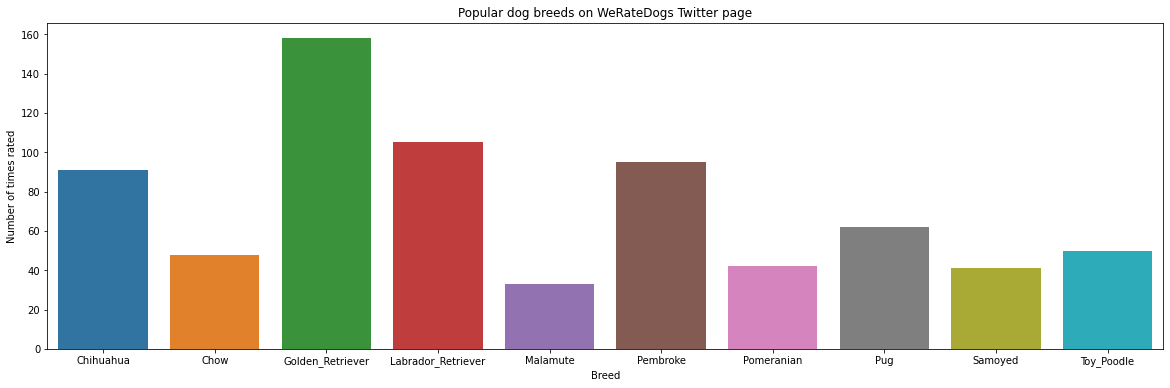

In [127]:
# choose the figure size of the plot
plt.figure(figsize=(20, 6))

# plot bar chart to display the information
sns.barplot(x=pop_df.index, y='tweet_id', data=pop_df.to_frame(), order=pop_df.sort_index().index);

# necessary labels and title
plt.title('Popular dog breeds on WeRateDogs Twitter page');
plt.xlabel('Breed');
plt.ylabel('Number of times rated');

* The Golden Retriever is the breed that has been rated the most on WeRateDogs.

-------------------------------------------------------------------------------------------------------------------------------

**2. What breed of dog is liked/favorited overall?**

In [131]:
# group the dataset by breed and sum the favorite_count column for each breed.
like_df = df.groupby('breed').sum()['favorite_count'].sort_values(ascending=False)[:10]

like_df

breed
Golden_Retriever      1691688.0
Labrador_Retriever    1041749.0
Pembroke               907636.0
Chihuahua              670867.0
French_Bulldog         527142.0
Samoyed                483052.0
Chow                   390400.0
Cocker_Spaniel         352987.0
Pug                    326080.0
Malamute               305341.0
Name: favorite_count, dtype: float64

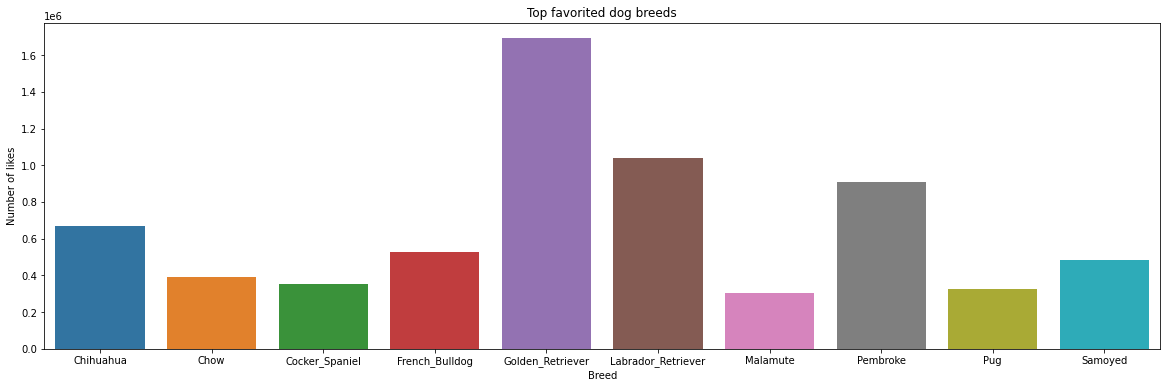

In [132]:
# choose the figure size of the plot
plt.figure(figsize=(20, 6))

# plot bar chart to display the information
sns.barplot(x=like_df.index, y='favorite_count', data=like_df.to_frame(), order=like_df.sort_index().index);

# necessary labels and title
plt.title('Top favorited dog breeds');
plt.xlabel('Breed');
plt.ylabel('Number of likes');

* The Golden Retriever is still the most favorited breed. This is expected as it is also the most popular breed in this dataset.
>Although this trend does not follow for other popular breeds.

* Another method that would show which dog breed was the most liked/favorited overall would be one that shows the average number of likes per dog breed.

In [193]:
# group the dataset by breed and find the average of the favorite_count column for each breed.
like_mean_df = df.groupby('breed').mean()['favorite_count'].sort_values(ascending=False)[:10]

like_mean_df

breed
Bedlington_Terrier         21596.000000
Saluki                     20841.000000
French_Bulldog             17571.400000
Bouvier_Des_Flandres       15390.000000
Afghan_Hound               14736.000000
Black-And-Tan_Coonhound    14700.000000
Flat-Coated_Retriever      14550.375000
Irish_Water_Spaniel        14003.000000
Whippet                    12732.636364
Leonberg                   12681.000000
Name: favorite_count, dtype: float64

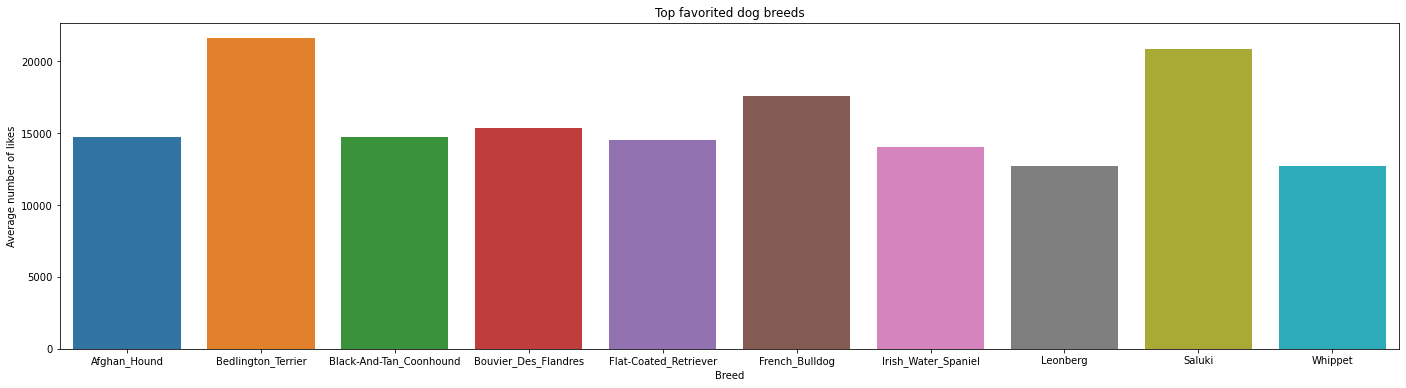

In [195]:
# choose the figure size of the plot
plt.figure(figsize=(24, 6))

# plot bar chart to display the information
sns.barplot(x=like_mean_df.index, y='favorite_count', data=like_mean_df.to_frame(), order=like_mean_df.sort_index().index);

# necessary labels and title
plt.title('Top favorited dog breeds');
plt.xlabel('Breed');
plt.ylabel('Average number of likes');

* Interesting! The Golden Retriever dog breed is nowhere to be seen. Infact none of the dog breeds in the sum bar graph are in this one. The Bedlington Terrier is the dog breed with the highest average number of likes per tweet, closely followed by the Saluki dog breed.

-------------------------------------------------------------------------------------------------------------------------------

**3. Is there a relationship between number of words/characters in a text and favorite_count?**

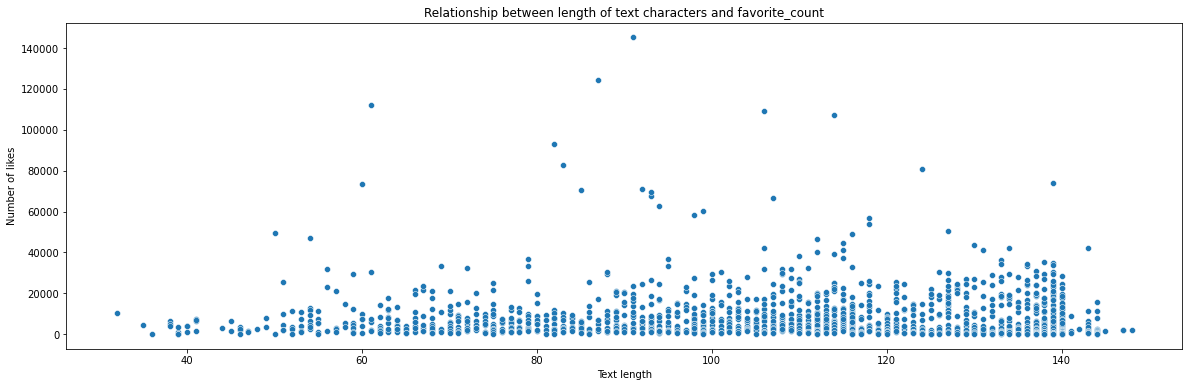

In [135]:
# choose the figure size of the plot
plt.figure(figsize=(20, 6))

# plot scatter plot to check relationship
sns.scatterplot(x='upper_text_range', y='favorite_count', data=df);

# necessary labels and title
plt.title('Relationship between length of text characters and favorite_count');
plt.xlabel('Text length');
plt.ylabel('Number of likes');

In [136]:
# check the pearson correlation coefficient between the two variables.
df[['upper_text_range', 'favorite_count']].corr()

,upper_text_range,favorite_count
upper_text_range,1.000000,-0.066843
favorite_count,-0.066843,1.000000


* There is very little/no relationship between the number of words in a tweet and number of likes.

-------------------------------------------------------------------------------------------------------------------------------

**4. Where does WeRateDogs tweets originate from the most?**

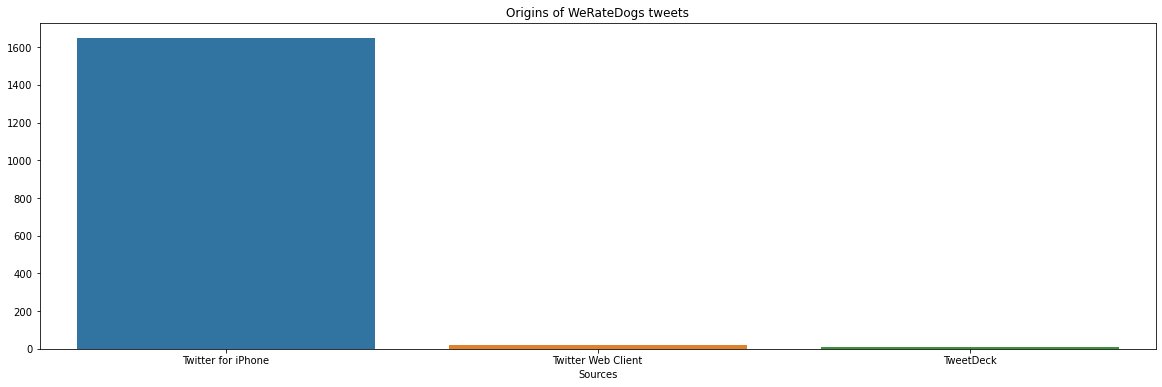

In [144]:
# choose the figure size of the plot
plt.figure(figsize=(20, 6))

# plot a count plot
sns.countplot(x='source', data=df);

# necessary labels and title
plt.title('Origins of WeRateDogs tweets');
plt.xlabel('Sources');
plt.ylabel('');

* It is very clear that most of the WeRateDogs tweets originated from one source.

-------------------------------------------------------------------------------------------------------------------------------

**5. How are tweets distributed by weekday and by month?**

In [151]:
# create a copy of the dataset
time_df = df.copy()

In [152]:
time_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1678 entries, 0 to 1677
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               1678 non-null   int64  
 1   in_reply_to_status_id  20 non-null     float64
 2   in_reply_to_user_id    20 non-null     float64
 3   timestamp              1678 non-null   object 
 4   source                 1678 non-null   object 
 5   text                   1678 non-null   object 
 6   expanded_urls          1678 non-null   object 
 7   rating_numerator       1677 non-null   float64
 8   rating_denominator     1677 non-null   float64
 9   name                   1214 non-null   object 
 10  dog_stage              254 non-null    object 
 11  jpg_url                1678 non-null   object 
 12  img_num                1678 non-null   int64  
 13  breed                  1678 non-null   object 
 14  confidence_interval    1678 non-null   float64
 15  retw

In [153]:
# convert timestamp column to datetime datatype...again
time_df['timestamp'] = pd.to_datetime(time_df['timestamp'])

In [154]:
# create a new column that shows the day of week for each tweet
time_df["day_of_week"] = time_df["timestamp"].apply(lambda x: x.dayofweek)

In [158]:
# Next, we'll map the different days of the week (0-6) to their actual days
time_df["day_of_week"] = time_df["day_of_week"].map({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday',
                                                     4: 'Friday', 5: 'Saturday', 6:'Sunday'})

In [159]:
# view changes
time_df["day_of_week"].unique()

array(['Tuesday', 'Monday', 'Sunday', 'Saturday', 'Friday', 'Thursday',
       'Wednesday'], dtype=object)

In [167]:
# group data to find the number of tweets per weekday
weekday = time_df.groupby('day_of_week').count()['tweet_id']

weekday

day_of_week
Friday       240
Monday       280
Saturday     209
Sunday       222
Thursday     244
Tuesday      244
Wednesday    239
Name: tweet_id, dtype: int64

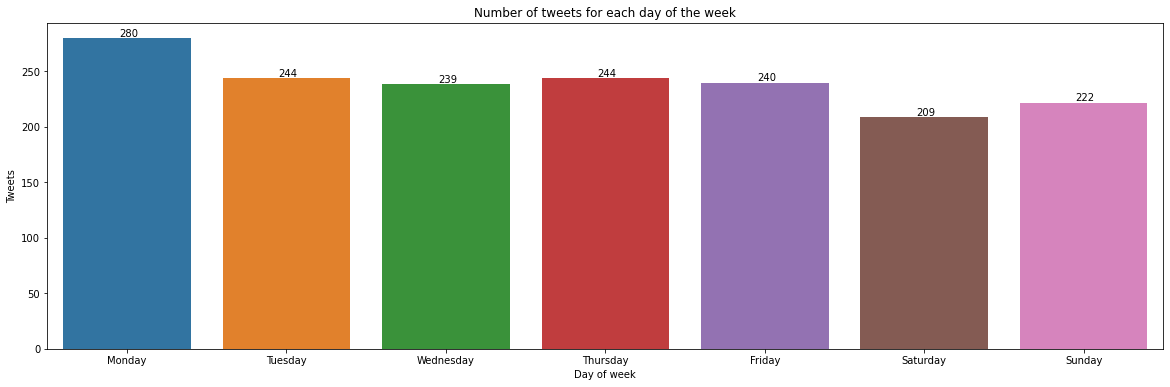

In [188]:
# choose the figure size of the plot
plt.figure(figsize=(20, 6))

# plot bar plot to show tweet distribution
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ax = sns.barplot(x=weekday.index, y='tweet_id', data=weekday.to_frame(), order=order);

# necessary labels and title
ax.set_title('Number of tweets for each day of the week');
ax.set_xlabel('Day of week');
ax.set_ylabel('Tweets');

# add count values on top of each bar
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + 0.35, p.get_height() + 1.5))

* It looks like in this dataset, Monday is by far the busiest, the rest of the weekdays are the same more or less, and the weekends see number of tweets drop especially on Saturday.

-------------------------------------------------------------------------------------------------------------------------------

##### For months of the year

In [181]:
# timestamp of the first tweet in the dataset
time_df['timestamp'].min()

Timestamp('2015-11-15 22:32:08+0000', tz='UTC')

In [182]:
# timestamp of the last tweet in the dataset
time_df['timestamp'].max()

Timestamp('2017-08-01 00:17:27+0000', tz='UTC')

In [183]:
# extract the month from the timestamp
time_df["month"] = time_df["timestamp"].apply(lambda x: x.month)

In [185]:
# Next, we map each month number(1-12) to their respective months
time_df["month"] = time_df["month"].map({1: 'January', 2: 'February', 3: 'March', 4: 'April',
                                         5: 'May', 6: 'June', 7: 'July', 8: 'August',
                                         9: 'September', 10: 'October', 11: 'November', 12: 'December'})

In [186]:
# view changes
time_df['month'].unique()

array(['August', 'July', 'June', 'May', 'April', 'March', 'February',
       'January', 'December', 'November', 'October', 'September'],
      dtype=object)

In [187]:
# group data to find the number of tweets per month
month = time_df.groupby('month').count()['tweet_id']

month

month
April         84
August        47
December     340
February     155
January      200
July         123
June         109
March        149
May           84
November     271
October       60
September     56
Name: tweet_id, dtype: int64

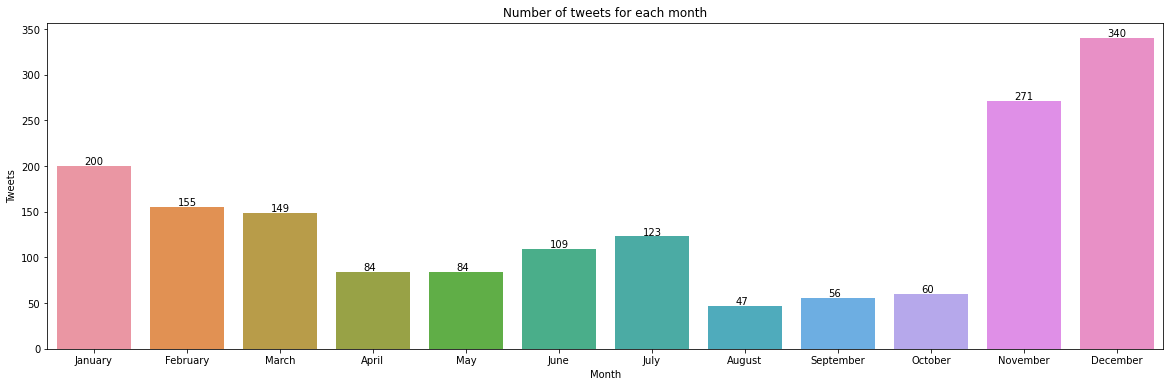

In [190]:
# choose the figure size of the plot
plt.figure(figsize=(20, 6))

# plot bar plot to show tweet distribution
order = ['January', 'February', 'March', 'April', 'May', 'June', 
         'July', 'August', 'September', 'October', 'November', 'December']
ax = sns.barplot(x=month.index, y='tweet_id', data=month.to_frame(), order=order);

# necessary labels and title
ax.set_title('Number of tweets for each month');
ax.set_xlabel('Month');
ax.set_ylabel('Tweets');

# add count values on top of each bar
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + 0.3, p.get_height() + 1.5))

* December has the most number of tweets, maybe because of the festive season?. November is the next highest.
> It is worth noting that the data was collected from November, 2015 till August 2017. So it is not a complete two years worth of data, September and October suffer this the most (might be why they're among the smallest).

-------------------------------------------------------------------------------------------------------------------------------

### Insights
1. The Golden Retriever is the dog breed that has been rated the most on WeRateDogs.

2. The Golden Retriever is also the dog breed with the highest favorite count.

3. There is very little/ no correlation between number of text characters and favorite count.

4. Most of the tweets on WeRateDogs originated from one source (Twitter for iPhone).

5. Monday is the busiest weekday with more tweets rolling out on this day. December is also the busiest month, with more tweets rolling out in this month.

-------------------------------------------------------------------------------------------------------------------------------

### Summary

In this project, we went through all the stages of the Data Wrangling process, from gathering the data from three different sources (locally, from a website and gathering data from an API), to assessing the data to identify errors and inconsistencies in the data, to cleaning the data using pandas/python's functions and modules. After, we analyzed the data and visualized it in order to generate insights.

-------------------------------------------------------------------------------------------------------------------------------